In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [80]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is D8CF-ADA7

 Directory of C:\Users\jshah\Google Drive\Code\World Cup Prediction

06/17/2018  08:52 PM    <DIR>          .
06/17/2018  08:52 PM    <DIR>          ..
06/14/2018  10:58 PM    <DIR>          .ipynb_checkpoints
06/14/2018  10:19 PM    <DIR>          Data
06/17/2018  08:52 PM           249,558 world_cup_pred.ipynb
               1 File(s)        249,558 bytes
               4 Dir(s)  90,192,470,016 bytes free


In [81]:
results = pd.read_csv('./Data/results.csv')
ranking = pd.read_csv('./Data/fifa_ranking.csv')

In [82]:
ranking.head(100)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [83]:
ranking = ranking.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted', 'rank_date']]
ranking = ranking.replace({'IR Iran': 'Iran'})
ranking['weighted_points'] = ranking['cur_year_avg_weighted'] + ranking['last_year_avg_weighted'] + ranking['two_year_ago_weighted'] + ranking['three_year_ago_weighted']
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
ranking.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted_points
0,1,Germany,GER,0.0,0.0,0.0,0.0,1993-08-08,0.0
1,2,Italy,ITA,0.0,0.0,0.0,0.0,1993-08-08,0.0
2,3,Switzerland,SUI,0.0,0.0,0.0,0.0,1993-08-08,0.0
3,4,Sweden,SWE,0.0,0.0,0.0,0.0,1993-08-08,0.0
4,5,Argentina,ARG,0.0,0.0,0.0,0.0,1993-08-08,0.0


In [84]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [85]:
results = results.replace({'Germany DR': 'Germany', 'China': 'China PR'})
results['date'] = pd.to_datetime(results['date'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [86]:
world_cup = pd.read_csv('./Data/World Cup 2018 Dataset.csv')

In [87]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [88]:
world_cup.columns.tolist()
world_cup['Team'].value_counts()

Mexico          1
Egypt           1
Morocco         1
Columbia        1
Poland          1
Russia          1
Costarica       1
Tunisia         1
Korea           1
Iceland         1
Germany         1
Saudi Arabia    1
France          1
Serbia          1
England         1
Porugal         1
Uruguay         1
Panama          1
Peru            1
Sweden          1
Croatia         1
Denmark         1
Japan           1
IRAN            1
Belgium         1
Brazil          1
Spain           1
Australia       1
Nigeria         1
Switzerland     1
Argentina       1
Senegal         1
Name: Team, dtype: int64

In [89]:
world_cup = world_cup.loc[:,['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
world_cup = world_cup.dropna(how = 'all')
world_cup = world_cup.replace({'IRAN': 'Iran', 'Costarica': 'Costa Rica', 'Columbia': 'Colombia', 'Porugal': 'Portugal', 'Korea': 'Korea Republic'})
world_cup = world_cup.set_index('Team')

In [90]:
world_cup.head()

,Group,First match against,Second match against,Third match against
Team,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay
Saudi Arabia,A,Russia,Uruguay,Egypt
Egypt,A,Uruguay,Russia,Saudi Arabia
Uruguay,A,Egypt,Saudi Arabia,Russia
Portugal,B,Spain,Morocco,Iran


## Feature Extraction

In [91]:
ranking = ranking.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys = False)\
            .resample('D').first()\
            .fillna(method = 'ffill')\
            .reset_index()

In [92]:
ranking

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,2003-01-15,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
1,2003-01-16,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
2,2003-01-17,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
3,2003-01-18,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
4,2003-01-19,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
5,2003-01-20,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
6,2003-01-21,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
7,2003-01-22,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
8,2003-01-23,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
9,2003-01-24,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00


In [93]:
results = results.merge(ranking, left_on = ['date', 'home_team'], right_on = ['rank_date', 'country_full'])
results = results.merge(ranking, left_on = ['date', 'away_team'], right_on = ['rank_date', 'country_full'], suffixes = ('_home', '_away'))
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,last_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,0.0,1993-08-08,22.0,Uruguay,URU,0.0,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,0.0,1993-08-08,14.0,Mexico,MEX,0.0,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,0.0,1993-08-08,94.0,Venezuela,VEN,0.0,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,0.0,1993-08-08,86.0,Sierra Leone,SLE,0.0,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,0.0,1993-08-08,5.0,Argentina,ARG,0.0,0.0,0.0,0.0,0.0


In [94]:
results['rank_difference'] = results['rank_home'] - results['rank_away']
results['average_rank'] = (results['rank_home'] + results['rank_away'])/2
results['point_difference'] = results['weighted_points_home'] - results['weighted_points_away']
results['score_difference'] = results['home_score'] - results['away_score']
results['is_won'] = results['score_difference'] > 0
results['is_stake'] = results['tournament'] != 'Friendly'

max_rest = 30
results['rest_days'] = results.groupby('home_team').diff()['date'].dt.days.clip(0, max_rest).fillna(max_rest)

results['wc_participant'] = results['home_team'] * results['home_team'].isin(world_cup.index.tolist())
results['wc_participant'] = results['wc_participant'].replace({'': 'Other'})
results = results.join(pd.get_dummies(results['wc_participant']))

In [95]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0


## Modelling

In [96]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [97]:
X, y = results.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], results['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logit = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree = 2)
model = Pipeline([('polynomial_features', features), ('logistic_regression', logit)])
model = model.fit(X_train, y_train)

#figures
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (15,5))
ax = plt.subplot(1, 3, 1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap = 'Blues', clim = (0, cm.max()))

ax.set_xlabel('Predicted Label')
ax.set_title('Performance of Test Set')

ax = plt.subplot(1, 3, 3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap = 'Blues', clim = (0, cm.max()))
ax.set_xlabel('Predicted Label')
ax.set_title('Performance of Training Set')
pass

In [98]:
features = ['average_rank', 'rank_difference', 'point_difference']
wrongs = y_test != model.predict(X_test)
for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])

print('Stakes distribution in the wrong prediction')
print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
print('Stakes distribution overall')
print(X['is_stake'].value_counts() / X.shape[0])

Stakes distribution in the wrong prediction
True     0.577608
False    0.422392
Name: is_stake, dtype: float64
Stakes distribution overall
True     0.615618
False    0.384382
Name: is_stake, dtype: float64


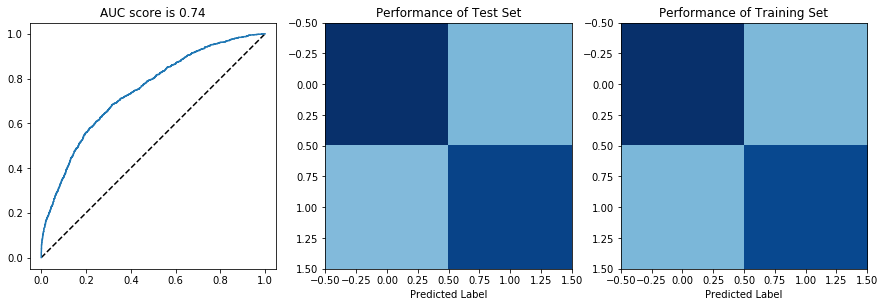

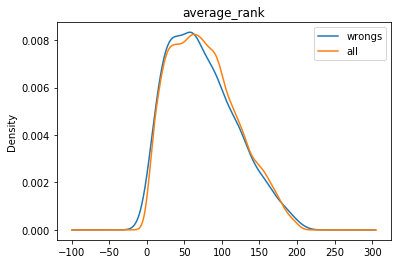

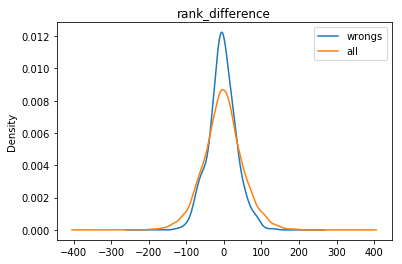

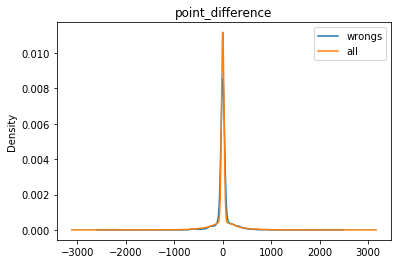

In [99]:
plt.show()

## World Cup Simulation

### Group Stage

In [100]:
margin = 0.09

world_cup_rankings = ranking.loc[(ranking['rank_date'] == ranking['rank_date'].max()) & ranking['country_full'].isin(world_cup.index.unique())]

world_cup_rankings = world_cup_rankings.set_index(['country_full'])

world_cup_rankings.head()

,rank_date,rank,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,,,,
Argentina,2018-06-07,5.0,ARG,404.07,404.80,248.99,183.59,1241.45
Australia,2018-06-07,36.0,AUS,366.60,193.77,98.16,59.79,718.32
Belgium,2018-06-07,3.0,BEL,629.98,322.82,158.94,186.58,1298.32
Brazil,2018-06-07,2.0,BRA,558.95,541.18,168.06,162.38,1430.57
Colombia,2018-06-07,16.0,COL,292.09,327.78,199.73,166.38,985.98


In [101]:
world_cup.head()

,Group,First match against,Second match against,Third match against
Team,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay
Saudi Arabia,A,Russia,Uruguay,Egypt
Egypt,A,Uruguay,Russia,Saudi Arabia
Uruguay,A,Egypt,Saudi Arabia,Russia
Portugal,B,Spain,Morocco,Iran


In [102]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting Group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print('{} vs {}:'.format(home, away), end = '')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with probability {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with probability {:.2f}".format(home, home_win_prob))
        if points == 1:
            print('Draw')
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting Group E:___
Brazil vs Switzerland:Draw
Brazil vs Costa Rica:Brazil wins with probability 0.64
Brazil vs Serbia:Brazil wins with probability 0.67
Switzerland vs Costa Rica:Switzerland wins with probability 0.61
Switzerland vs Serbia:Switzerland wins with probability 0.65
Costa Rica vs Serbia:Draw
___Starting Group D:___
Argentina vs Iceland:Argentina wins with probability 0.61
Argentina vs Croatia:Argentina wins with probability 0.60
Argentina vs Nigeria:Argentina wins with probability 0.71
Iceland vs Croatia:Draw
Iceland vs Nigeria:Iceland wins with probability 0.62
Croatia vs Nigeria:Croatia wins with probability 0.63
___Starting Group H:___
Poland vs Senegal:Poland wins with probability 0.61
Poland vs Colombia:Draw
Poland vs Japan:Poland wins with probability 0.73
Senegal vs Colombia:Colombia wins with probability 0.59
Senegal vs Japan:Senegal wins with probability 0.65
Colombia vs Japan:Colombia wins with probability 0.70
___Starting Group G:___
Belgium vs Panama:Belgium

In [103]:
world_cup

,Group,First match against,Second match against,Third match against,points,total_prob
Team,,,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay,1,0.954150
Saudi Arabia,A,Russia,Uruguay,Egypt,1,1.073837
Egypt,A,Uruguay,Russia,Saudi Arabia,6,1.597487
Uruguay,A,Egypt,Saudi Arabia,Russia,9,2.374526
Portugal,B,Spain,Morocco,Iran,7,1.908790
Spain,B,Portugal,Iran,Morocco,7,1.757223
Morocco,B,Iran,Portugal,Spain,1,1.104457
Iran,B,Morocco,Spain,Portugal,1,1.229529
France,C,Australia,Peru,Denmark,5,1.716342


In [104]:
points_table = world_cup.loc[:, ['points', 'Group']]
points_table

,points,Group
Team,,
Russia,1,A
Saudi Arabia,1,A
Egypt,6,A
Uruguay,9,A
Portugal,7,B
Spain,7,B
Morocco,1,B
Iran,1,B
France,5,C


### Knockouts

In [105]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Uruguay vs. Spain: Spain wins with probability 0.55
France vs. Croatia: France wins with probability 0.58
Brazil vs. Mexico: Brazil wins with probability 0.60
Belgium vs. Colombia: Belgium wins with probability 0.59
Egypt vs. Portugal: Portugal wins with probability 0.80
Peru vs. Argentina: Argentina wins with probability 0.56
Switzerland vs. Germany: Germany wins with probability 0.60
England vs. Poland: Poland wins with probability 0.55


___Starting of the quarterfinal___
Spain vs. France: France wins with probability 0.53
Brazil vs. Belgium: Brazil wins with probability 0.52
Portugal vs. Argentina: Portugal wins with probability 0.51
Germany vs. Poland: Germany wins with probability 0.58


___Starting of the semifinal___
France vs. Brazil: Brazil wins with probability 0.57
Portugal vs. Germany: Germany wins with probability 0.57


___Starting of the final___
Brazil vs. Germany: Germany wins with probability 0.53


